Importing the necessary libraries: 

In [116]:
# necessary libraries to organize and visualize the data
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


# necessary libraries for ML model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# necessary libraries for hypothesis testing
from scipy.stats import mannwhitneyu

Extracting the timestamps for each html file:

In [117]:
# List of uploaded files
files = [
    "0.html","1.html","2.html","3.html","4.html","5.html","6.html","7.html","8.html","9.html","10.html","11.html","12.html",
    "ads_viewed.html","emoji_sliders.html","liked_comments.html","liked_posts.html","polls.html","post_comments_1.html",
    "post_viewed.html","posts_you're_not_interested_in.html","questions.html", "quizzes.html","reels_comments.html","saved_collections.html",
    "saved.posts.html","stories.html","story_likes.html","story_reaction_sticker_reactions.html","videos_watched.html"
]

# Function to extract timestamps from an HTML file
def extract_timestamps(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as file:
            soup = BeautifulSoup(file, "html.parser")

        # Adjust the class or tag selection based on the file structure
        timestamp_elements = soup.find_all("td", class_="_2pin _2piu _a6_r")  # Modify this if necessary

        # Extract the timestamp text
        timestamps = [elem.get_text(strip=True) for elem in timestamp_elements]

        return timestamps if timestamps else ["No timestamps found"]
    except Exception as e:
        return [f"Error: {str(e)}"]

# Dictionary to store extracted timestamps
timestamps_data = {}

# Process each file
for file in files:
    if os.path.exists(file):
        timestamps_data[file] = extract_timestamps(file)
    else:
        timestamps_data[file] = ["File not found"]

# Convert extracted data into a DataFrame
df_timestamps = pd.DataFrame.from_dict(timestamps_data, orient="index").transpose()

# Save the extracted timestamps to a CSV file
df_timestamps.to_csv("extracted_timestamps.csv", index=False)

# Display the extracted timestamps
print("Timestamps extracted successfully!")
print(df_timestamps.head())

Timestamps extracted successfully!
                 0.html                 1.html                 2.html  \
0      1612708812183031       1427615667454320       1935581736630419   
1             PAGE_VIEW                 CUSTOM  COMPLETE_REGISTRATION   
2  Dec 30, 2024 2:00 am  Dec 28, 2024 11:38 am   Dec 12, 2024 4:00 pm   
3                  None       1427615667454320                   None   
4                  None                 CUSTOM                   None   

                 3.html                 4.html                5.html  \
0       391129144681014       1506955003251576       153692598658185   
1             PAGE_VIEW              PAGE_VIEW          VIEW_CONTENT   
2  Dec 12, 2024 7:15 am  Nov 16, 2024 12:44 am  Jun 25, 2024 2:11 pm   
3       391129144681014                   None       767646203364875   
4             PAGE_VIEW                   None          VIEW_CONTENT   

                  6.html                7.html                8.html  \
0        891502007900

A histogram which will display the distrubiton of interaction throughout the year :

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20328\2191326554.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  valid_timestamps = pd.to_datetime(timestamps, errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20328\2191326554.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts["Month"].astype(str), y=month_counts["Count"], palette="viridis")


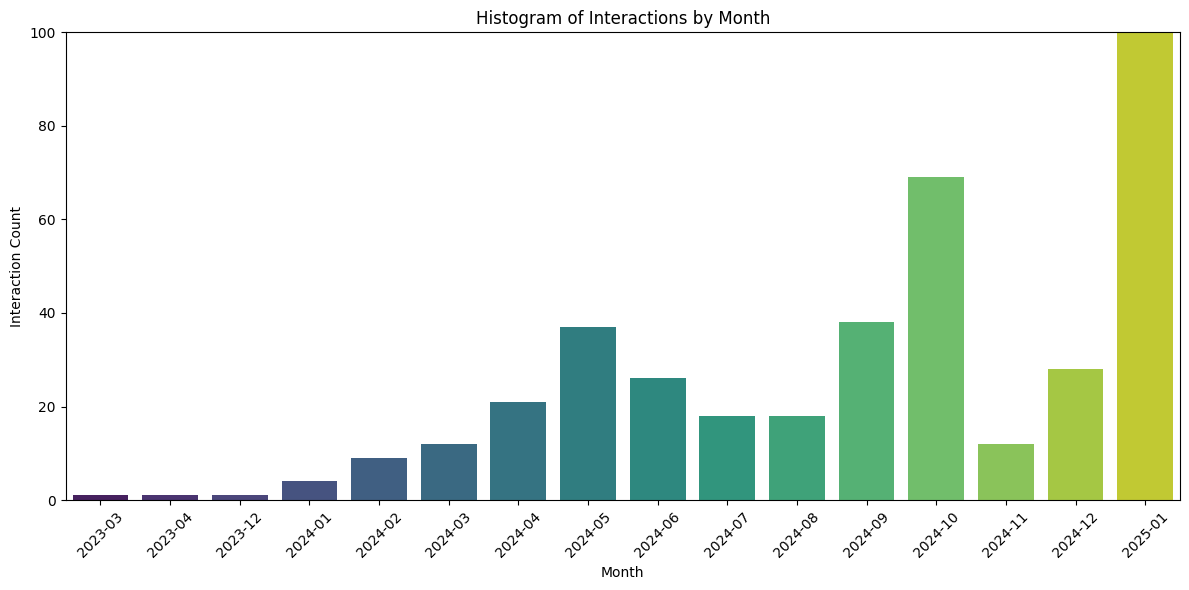

In [118]:
# Load the dataset
data = pd.read_csv('extracted_timestamps.csv')

# Step 1: Extract and consolidate timestamp data
timestamps = []
for column in data.columns:
    timestamps.extend(data[column].dropna().values)

# Convert to datetime and drop invalid entries
valid_timestamps = pd.to_datetime(timestamps, errors='coerce')
valid_timestamps = valid_timestamps.dropna()

# Convert to Pandas Series to use `.dt`
valid_timestamps = pd.Series(valid_timestamps)

# Extract months and years from timestamps
months = valid_timestamps.dt.to_period('M')

# Step 2: Create a histogram for interactions by month
month_counts = pd.DataFrame(months, columns=["Month"]).value_counts().reset_index()
month_counts.columns = ["Month", "Count"]
month_counts = month_counts.sort_values(by="Month")

# Plot histogram grouped by month
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts["Month"].astype(str), y=month_counts["Count"], palette="viridis")
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set the y-axis range to 0-20
plt.title("Histogram of Interactions by Month")
plt.xlabel("Month")
plt.ylabel("Interaction Count")
plt.tight_layout()
plt.show()

The distribution of the exam dates which are extracted by hand:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20328\4017601721.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts['Month'].astype(str), y=month_counts['Count'], palette='viridis')


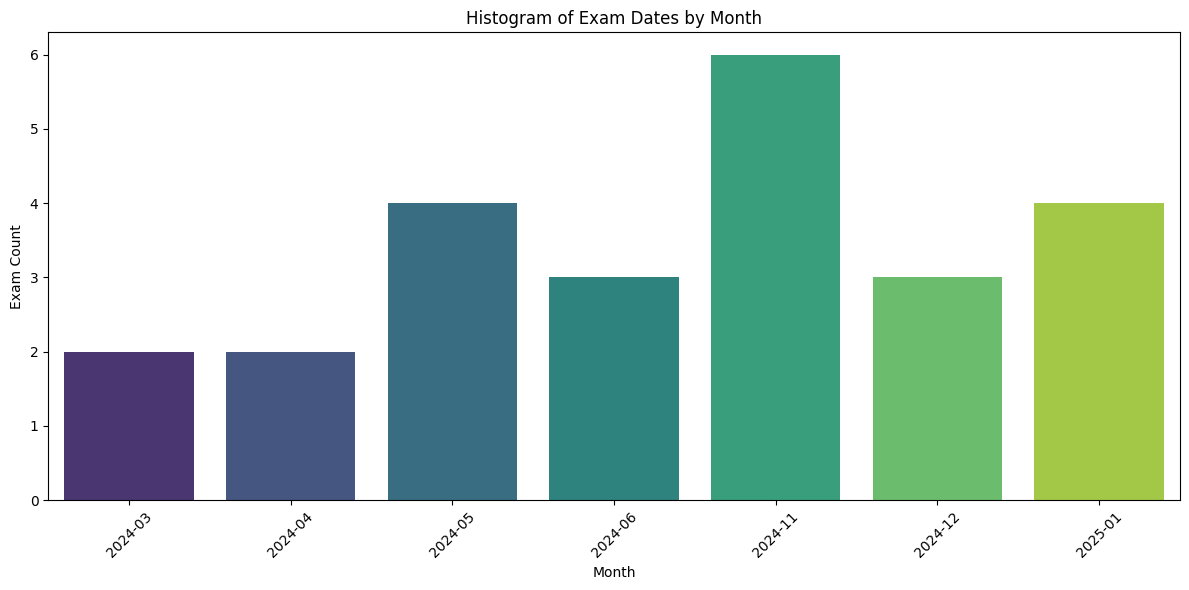

In [119]:
# Load the text file
file_path = 'sınav_tarihleri.txt'  # Ensure this file is in the same directory as your script
with open(file_path, 'r') as file:
    dates = file.readlines()

# Clean and convert dates
dates = [date.strip() for date in dates]  # Remove whitespace
dates = pd.to_datetime(dates, format='%d/%m/%Y')  # Convert to datetime format

# Group dates by month
months = dates.to_series().dt.to_period('M')
month_counts = months.value_counts().reset_index()
month_counts.columns = ['Month', 'Count']
month_counts = month_counts.sort_values(by='Month')

# Plot histogram grouped by month
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts['Month'].astype(str), y=month_counts['Count'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Histogram of Exam Dates by Month")
plt.xlabel("Month")
plt.ylabel("Exam Count")
plt.tight_layout()
plt.show()


Creating a time series graph to see the relation between exam times and the total Instagram interactions:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20328\2699629844.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20328\2699629844.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20328\2699629844.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20328\2699629844.py:7: UserWarning: Coul

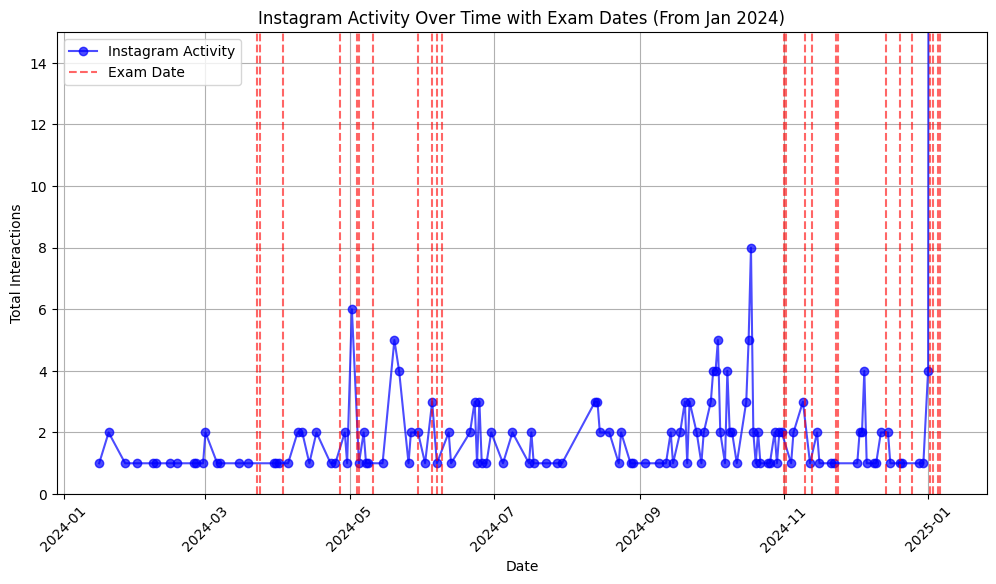

In [120]:
# Reload the extracted timestamps CSV file
file_path = "extracted_timestamps.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

# Convert timestamps to datetime format
for col in df.columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop rows where all values are NaT (not a timestamp)
df = df.dropna(how='all')

# Transform the data into a long format
df = df.melt(var_name="Category", value_name="Timestamp").dropna()

# Aggregate all interactions per day
df["Date"] = df["Timestamp"].dt.date  # Convert to date format
daily_interactions = df.groupby("Date").size().reset_index(name="Total Interactions")

# Convert Date column back to pandas.Timestamp for correct comparison
daily_interactions["Date"] = pd.to_datetime(daily_interactions["Date"])

# Load exam dates from the provided text file
exam_dates_file = "sınav_tarihleri.txt"
exam_dates = pd.read_csv(exam_dates_file, header=None, names=["Exam Date"], dayfirst=True)
exam_dates["Exam Date"] = pd.to_datetime(exam_dates["Exam Date"], format="%d/%m/%Y")

# Define the start and latest date
start_date = pd.Timestamp("2024-01-01")  # Ensure start_date is a pandas.Timestamp
latest_date = daily_interactions["Date"].max()

# Filter Instagram activity data within the specified range
filtered_interactions = daily_interactions[
    (daily_interactions["Date"] >= start_date) & (daily_interactions["Date"] <= latest_date)
]

# Plot the Instagram activity time series with exam dates
plt.figure(figsize=(12, 6))
plt.plot(filtered_interactions["Date"], filtered_interactions["Total Interactions"], marker="o", linestyle="-", color="b", alpha=0.7, label="Instagram Activity")

# Mark exam dates with vertical red lines
for date in exam_dates["Exam Date"]:
    if start_date <= date <= latest_date:
        plt.axvline(pd.Timestamp(date), color="r", linestyle="--", alpha=0.6, label="Exam Date" if date == exam_dates["Exam Date"].iloc[0] else "")

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Total Interactions")
plt.title("Instagram Activity Over Time with Exam Dates (From Jan 2024)")
plt.ylim(0, 15)  # Adjust y-axis to range from 0 to 15
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Using the recommended_topics.html file which is provided by Instagram, predicting the top 5 topics which I will be interested in using the TF-IDF vectorization and Cosine similarity:

In [121]:


# Load and extract "Recommended Topics" from the HTML file
recommended_file = "recommended_topics.html"  # Ensure this file is in the same directory
with open(recommended_file, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

# Extract recommended topics
recommended_topics = [div.text.strip() for div in soup.find_all("div") if div.text.strip()]

# Convert to DataFrame
df_recommended = pd.DataFrame(recommended_topics, columns=["Topic"])

# Remove general descriptions
df_recommended["Topic"] = df_recommended["Topic"].replace(
    "A collection of topics determined by your activity on Instagram that is used to create recommendations for you in different areas of Instagram, such as Reels, feed recommendations, and Shopping",
    "",
    regex=False
).str.strip()

# Remove redundant words like "Recommended Topics", "Name"
df_recommended["Topic"] = df_recommended["Topic"].replace(r"Recommended Topics|Topics|Name", "", regex=True).str.strip()

# Improved splitting: handle commas, ampersands, and excessive spaces while keeping meaningful topics intact
df_recommended_cleaned = df_recommended["Topic"].apply(lambda x: re.split(r",|\s&\s|\s{2,}|\b(?<=\w)(?=[A-Z])", x))

# Flatten list and create a new DataFrame
df_recommended_cleaned = pd.DataFrame(
    [item.strip() for sublist in df_recommended_cleaned for item in sublist if item.strip()], 
    columns=["Topic"]
)

# Remove duplicates
df_recommended_cleaned = df_recommended_cleaned.drop_duplicates().reset_index(drop=True)

# Remove topics that are improperly concatenated (overly long topics due to merging)
df_recommended_cleaned = df_recommended_cleaned[~df_recommended_cleaned["Topic"].str.contains(r"\w{5,}\s\w{5,}\w{5,}", regex=True)]

# Filter out overly long merged entries by setting a reasonable word limit
df_recommended_cleaned = df_recommended_cleaned[df_recommended_cleaned["Topic"].apply(lambda x: len(x.split()) <= 5)]

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_recommended_cleaned["Topic"])

# Compute similarity scores
similarity_matrix = cosine_similarity(X)
df_recommended_cleaned["Interest_Score"] = similarity_matrix.sum(axis=1)

# Get the top 5 unique predicted topics
df_top_interests = df_recommended_cleaned.sort_values(by="Interest_Score", ascending=False).head(5)

# Format and display results
top_topics = df_top_interests["Topic"].tolist()
formatted_topics = "\n".join([f"{i+1}) {topic}" for i, topic in enumerate(top_topics)])

# Print the top 5 predicted interests
print("Top 5 Predicted Interests:\n")
print(formatted_topics)


Top 5 Predicted Interests:

1) Types of Sports
2) Beauty Product Types
3) Video Games by Game Mechanics
4) Travel by Region
5) Video Games


Testing the hypothesis that the interaction amount is falling during exam times with Mann-Whitney U test:

In [126]:
# Load the dataset
data = pd.read_csv("extracted_timestamps.csv")  # Assuming the file is in the same directory

# Step 1: Extract and consolidate timestamp data
timestamps = []
for column in data.columns:
    timestamps.extend(data[column].dropna().values)

# Convert to datetime and drop invalid entries
valid_timestamps = pd.to_datetime(timestamps, errors='coerce')
valid_timestamps = valid_timestamps.dropna()

# Convert to Pandas Series to use `.dt`
valid_timestamps = pd.Series(valid_timestamps)

# Step 2: Extract only the date part from timestamps and load exam dates
valid_timestamps_date = valid_timestamps.dt.date

exam_dates = pd.read_csv("sınav_tarihleri.txt", header=None, names=["Exam_Date"])
exam_dates["Exam_Date"] = pd.to_datetime(exam_dates["Exam_Date"], format="%d/%m/%Y")

# Step 3: Mark interactions that occur during exam periods
exam_periods = valid_timestamps_date[valid_timestamps_date.isin(exam_dates["Exam_Date"].dt.date)]
non_exam_periods = valid_timestamps_date[~valid_timestamps_date.isin(exam_dates["Exam_Date"].dt.date)]

# Step 4: Perform the Mann-Whitney U test to compare activity counts
exam_period_counts = exam_periods.value_counts()
non_exam_period_counts = non_exam_periods.value_counts()

# Align the data to make sure both groups have the same dates
all_dates = sorted(set(exam_period_counts.index).union(set(non_exam_period_counts.index)))
exam_counts_aligned = exam_period_counts.reindex(all_dates, fill_value=0)
non_exam_counts_aligned = non_exam_period_counts.reindex(all_dates, fill_value=0)

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(exam_counts_aligned, non_exam_counts_aligned, alternative='less')

# Output the results of the hypothesis test
print("U-Statistic:", stat)
print("P-Value:", p_value)

# Hypothesis testing: If p-value < 0.05, we reject the null hypothesis (interactions do drop during exam periods)
if p_value < 0.05:
    print("Reject the null hypothesis: Interactions drop during exam periods.")
else:
    print("Fail to reject the null hypothesis: No significant drop in interactions during exam periods.")

U-Statistic: 1853.0
P-Value: 4.430379296693675e-47
Reject the null hypothesis: Interactions drop during exam periods.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20328\975803736.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  valid_timestamps = pd.to_datetime(timestamps, errors='coerce')
